# 1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# 2. Load the Dataset

In [3]:
data=pd.read_csv("personalised_dataset.csv")
data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Type,Blood_Pressure,Cholesterol,...,Resting_Heart_Rate,HRV,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,CRP,eGFR,Waist_Circumference
0,1,55,Male,26.0,Current smoker,NaN,Lightly Active,Vegetarian,129/70,201.9,...,68,66,129,70,106.0,63.5,162.2,1.59,84.4,51.2
1,2,33,Male,29.5,Non-smoker,Low,Sedentary,Vegetarian,106/64,202.8,...,77,29,106,64,112.5,43.4,234.3,1.78,115.4,74.5
2,3,62,Female,31.3,Non-smoker,Low,Lightly Active,Keto,103/80,207.4,...,66,56,103,80,147.6,55.8,20.0,1.20,97.0,72.0
3,4,65,Male,19.0,Non-smoker,High,Lightly Active,Vegetarian,121/69,179.6,...,74,52,121,69,92.9,56.8,149.5,0.00,101.4,50.0
4,5,19,Male,26.1,Non-smoker,Low,Moderately Active,Vegan,103/61,181.1,...,74,48,103,61,87.4,60.5,166.2,1.32,137.3,56.0


# 3. Data Overview

In [4]:
data.shape

(2000, 40)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                2000 non-null   int64  
 1   Age                       2000 non-null   int64  
 2   Gender                    2000 non-null   object 
 3   BMI                       2000 non-null   float64
 4   Smoking_Status            2000 non-null   object 
 5   Alcohol_Consumption       1530 non-null   object 
 6   Physical_Activity_Level   2000 non-null   object 
 7   Diet_Type                 2000 non-null   object 
 8   Blood_Pressure            2000 non-null   object 
 9   Cholesterol               2000 non-null   float64
 10  Glucose_Level             2000 non-null   float64
 11  HbA1c                     2000 non-null   float64
 12  Heart_Disease_Risk        2000 non-null   object 
 13  Diabetes_Risk             2000 non-null   object 
 14  Health_R

In [6]:
data.isna().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Alcohol_Consumption         470
Physical_Activity_Level       0
Diet_Type                     0
Blood_Pressure                0
Cholesterol                   0
Glucose_Level                 0
HbA1c                         0
Heart_Disease_Risk            0
Diabetes_Risk                 0
Health_Risk                   0
Predicted_Insurance_Cost      0
Diet_Recommendation           0
Exercise_Recommendation       0
PRS_Cardiometabolic           0
PRS_Type2Diabetes             0
APOE_e4_Carrier               0
BRCA_Pathogenic_Variant       0
Family_History_CVD            0
Family_History_T2D            0
Stress_Level                  0
Depression_Score              0
Anxiety_Score                 0
Social_Isolation_Index        0
Sleep_Hours                   0
Sleep_Quality                 0
Resting_Heart_Rate            0
HRV     

In [7]:
data.describe()

,Patient_ID,Age,BMI,Cholesterol,Glucose_Level,HbA1c,Predicted_Insurance_Cost,PRS_Cardiometabolic,PRS_Type2Diabetes,APOE_e4_Carrier,...,Resting_Heart_Rate,HRV,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,CRP,eGFR,Waist_Circumference
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.00000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,49.226000,27.170100,197.225500,91.485250,5.065200,1343.072010,-0.00826,0.009289,0.145000,...,71.3865,49.220500,111.13750,71.047000,116.88160,50.84925,147.476700,1.510000,102.688500,65.773400
std,577.494589,15.477425,5.089991,34.674183,12.773423,0.630173,750.814938,0.99613,1.001611,0.352189,...,7.2829,13.840761,13.58738,9.200495,30.74477,12.40696,59.675029,0.934794,15.973697,12.023425
min,1.000000,18.000000,16.000000,83.600000,50.000000,3.500000,331.800000,-2.90900,-3.000000,0.000000,...,47.0000,10.000000,80.00000,40.000000,40.00000,10.00000,20.000000,0.000000,55.300000,50.000000
25%,500.750000,38.000000,23.800000,174.875000,83.100000,4.600000,598.190000,-0.68800,-0.676750,0.000000,...,66.0000,40.000000,102.00000,65.000000,96.20000,42.20000,107.100000,0.830000,92.200000,55.875000
50%,1000.500000,50.000000,26.900000,198.150000,91.400000,5.100000,1191.900000,-0.00400,0.002500,0.000000,...,71.0000,49.000000,111.00000,71.000000,117.30000,50.60000,145.150000,1.480000,102.700000,64.550000
75%,1500.250000,60.000000,30.500000,219.200000,99.800000,5.500000,2018.102500,0.66325,0.710250,0.000000,...,77.0000,59.000000,120.00000,77.000000,137.02500,59.30000,186.525000,2.090000,113.700000,73.825000
max,2000.000000,85.000000,50.300000,328.400000,134.200000,7.100000,3684.190000,2.93900,3.000000,1.000000,...,93.0000,96.000000,153.00000,109.000000,244.60000,91.80000,335.200000,4.710000,140.000000,127.100000


# 4. Handle Missing Values

In [8]:
data['Alcohol_Consumption']=data['Alcohol_Consumption'].fillna('Unknown')

# 5. Select Target & Features

#### Target

In [9]:
y=data['Diabetes_Risk']

#### Columns to EXCLUDE (Data Leakage)

In [10]:
drop_columns = [
    "Diet_Recommendation",
    "Exercise_Recommendation",
    "Health_Risk",
    "Heart_Disease_Risk",
    "Predicted_Insurance_Cost",
    'Diabetes_Risk'
]


#### Features

In [11]:
X=data.drop(columns=drop_columns)

# 6. Exploratory Data Analysis (EDA)

### Diabetes Risk Distribution

C:\Users\mbima\AppData\Local\Temp\ipykernel_6596\2590713461.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y,palette='deep',saturation=1)


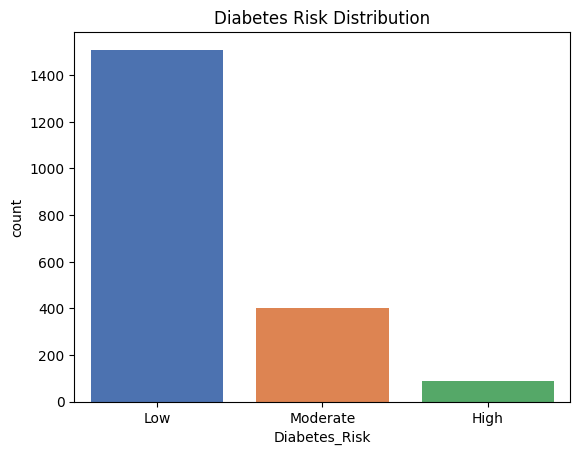

In [12]:
sns.countplot(x=y,palette='deep',saturation=1)
plt.title("Diabetes Risk Distribution")
plt.show()

### Glucose vs Diabetes Risk

C:\Users\mbima\AppData\Local\Temp\ipykernel_6596\1985045343.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=data["Glucose_Level"],palette='Set2')


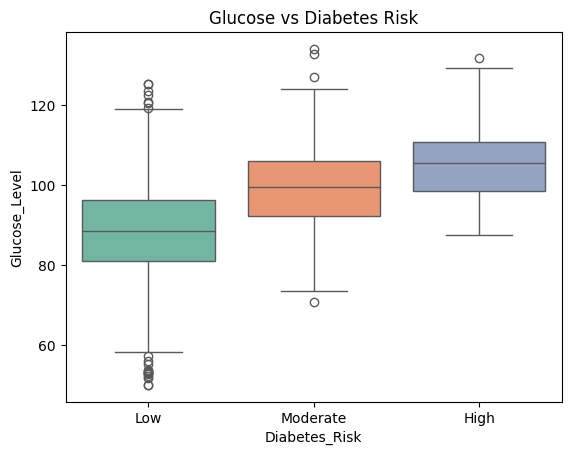

In [13]:
sns.boxplot(x=y, y=data["Glucose_Level"],palette='Set2')
plt.title("Glucose vs Diabetes Risk")
plt.show()


### Correlation Heatmap

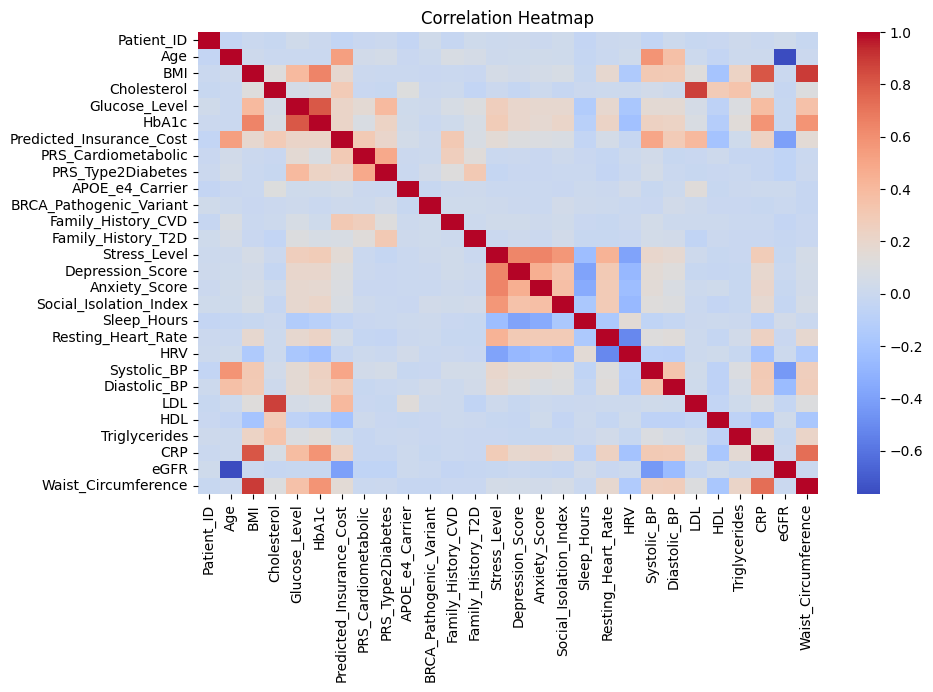

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data.select_dtypes(include=np.number).corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Heatmap")
plt.show()


# 7. Identify Feature Types

In [15]:
numerical_features=X.select_dtypes(include=['int64','float64']).columns
categorical_features=X.select_dtypes(include=["object"]).columns



In [16]:
print("Numerical Features:",numerical_features)

Numerical Features: Index(['Patient_ID', 'Age', 'BMI', 'Cholesterol', 'Glucose_Level', 'HbA1c',
       'PRS_Cardiometabolic', 'PRS_Type2Diabetes', 'APOE_e4_Carrier',
       'BRCA_Pathogenic_Variant', 'Family_History_CVD', 'Family_History_T2D',
       'Stress_Level', 'Depression_Score', 'Anxiety_Score',
       'Social_Isolation_Index', 'Sleep_Hours', 'Resting_Heart_Rate', 'HRV',
       'Systolic_BP', 'Diastolic_BP', 'LDL', 'HDL', 'Triglycerides', 'CRP',
       'eGFR', 'Waist_Circumference'],
      dtype='object')


In [17]:
print("Categorical Features",categorical_features)

Categorical Features Index(['Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Diet_Type', 'Blood_Pressure',
       'Sleep_Quality'],
      dtype='object')


# 8. Preprocessing Pipeline

In [18]:
numeric_pipeline=Pipeline(steps=[
    ('scaler',StandardScaler())
])

categorical_pipeline=Pipeline(steps=[
    ("encoder",OneHotEncoder(drop='first',handle_unknown="ignore"))
])


preprocessor=ColumnTransformer(
    transformers=[
        ("num",numeric_pipeline,numerical_features),
        ("cat",categorical_pipeline,categorical_features)
    ]
)

# 9. Train-Test Split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 10. Model building(Random Forest)

In [58]:
model=(Pipeline(steps=[
    ('preprocessor',preprocessor),
    ("classifier",RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
]))

# 11. Train the Model

In [59]:
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 12. Model Evalution

In [60]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\mbima\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.11      0.20        18
         Low       0.83      1.00      0.91       302
    Moderate       0.60      0.26      0.37        80

    accuracy                           0.81       400
   macro avg       0.81      0.46      0.49       400
weighted avg       0.79      0.81      0.77       400


Confusion Matrix:
 [[  2   2  14]
 [  0 302   0]
 [  0  59  21]]


# 13. Feature Importance

In [61]:
feature_names = (
    numerical_features.tolist() +
    list(
        model.named_steps["preprocessor"]
        .named_transformers_["cat"]
        .named_steps["encoder"]
        .get_feature_names_out(categorical_features)
    )
)

importances = model.named_steps["classifier"].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)


In [66]:
feat_imp

Age                      0.076274
PRS_Type2Diabetes        0.068605
Glucose_Level            0.057843
eGFR                     0.049672
Systolic_BP              0.044651
                           ...   
Blood_Pressure_93/58     0.000000
Blood_Pressure_104/58    0.000000
Blood_Pressure_100/84    0.000000
Blood_Pressure_106/50    0.000000
Blood_Pressure_97/77     0.000000
Length: 1078, dtype: float64

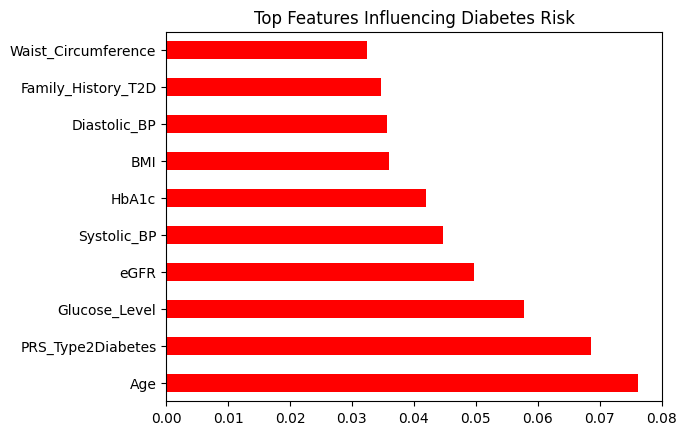

In [62]:
feat_imp.head(10).plot(kind="barh",color='red',
                       title="Top Features Influencing Diabetes Risk")
plt.show()


# 14. Recommendation Engine

In [25]:
def diabetes_recommendation(risk):
    if risk == "Low":
        return "Maintain a healthy diet and regular physical activity."
    elif risk == "Medium":
        return "Lifestyle modifications advised. Monitor blood glucose regularly."
    else:
        return "Consult a physician immediately. Strict diet, exercise, and medical supervision required."


# 15.Test with New Patient Data

In [41]:
new_patient = X.iloc[[0]].copy()


In [52]:
new_patient["Age"] = 55
new_patient["Glucose_Level"] = 185
new_patient["HbA1c"] = 8.3
new_patient["Family_History_T2D"] = 1
new_patient["APOE_e4_Carrier"] = 1

new_patient.head()


,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Type,Blood_Pressure,Cholesterol,...,Resting_Heart_Rate,HRV,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,CRP,eGFR,Waist_Circumference
0,1,55,Male,31.8,Current smoker,Unknown,Lightly Active,Vegetarian,129/70,201.9,...,68,66,129,70,106.0,63.5,162.2,1.59,84.4,51.2


In [56]:
predicted_risk = model.predict(new_patient)[0]

print("Predicted Diabetes Risk:", predicted_risk)

recommendation = diabetes_recommendation(predicted_risk)
print(recommendation)


Predicted Diabetes Risk: Low
Maintain a healthy diet and regular physical activity.
